In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_excel('daily_offers.xlsx')
df.head(5)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [3]:
df1 = df.copy()


In [4]:
df1.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [5]:
df1 = df1.fillna(df1.mean())

In [6]:
df1.isnull().sum()

id                   2
item_date            0
quantity tons        0
customer             0
country              0
status               2
item type            0
application          0
thickness            0
width                0
material_ref     77919
product_ref          0
delivery date        0
selling_price        0
dtype: int64

In [7]:
df1 = df1.drop_duplicates()
df1['status'] = df1['status'].fillna(method='bfill', axis=0)
df1.drop(['material_ref','id'], inplace = True, axis=1)
df1['item_date'] = df1['item_date'].astype('object')
df1['delivery date'] = df1['delivery date'].astype('object')
df1['customer'] = df1['customer'].astype('object')
df1['country'] = df1['country'].astype('object')
df1['application'] = df1['application'].astype('object')
df1['product_ref'] = df1['product_ref'].astype('object')

In [8]:
df1.isnull().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

# Number of unique values in each column

In [9]:
for col in df1.columns:
    print(col, ':', df1[col].nunique())

item_date : 253
quantity tons : 181673
customer : 1170
country : 18
status : 9
item type : 7
application : 31
thickness : 595
width : 1386
product_ref : 33
delivery date : 29
selling_price : 9796


# Making Quantity tons float by removing string value from it and converting it into float 

In [10]:
invalid_rows = df1[pd.to_numeric(df1["quantity tons"], errors='coerce').isnull()]
df1 = df1.drop(invalid_rows.index)
df1["quantity tons"] = pd.to_numeric(df1["quantity tons"], errors='raise')


In [11]:
df1.head(5)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00
2,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,20210101.0,644.33
3,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,20210101.0,768.00
4,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,20210301.0,577.00


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181672 entries, 0 to 181672
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_date      181672 non-null  object 
 1   quantity tons  181672 non-null  float64
 2   customer       181672 non-null  object 
 3   country        181672 non-null  object 
 4   status         181672 non-null  object 
 5   item type      181672 non-null  object 
 6   application    181672 non-null  object 
 7   thickness      181672 non-null  float64
 8   width          181672 non-null  float64
 9   product_ref    181672 non-null  object 
 10  delivery date  181672 non-null  object 
 11  selling_price  181672 non-null  float64
dtypes: float64(4), object(8)
memory usage: 18.0+ MB


In [13]:
df1.shape

(181672, 12)

In [14]:
df1.isnull().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [15]:
df1['quantity tons'] = df1['quantity tons'].fillna(method='pad', axis=0)

In [16]:
df1.isna().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

# creating a list of categorical and numerical data

In [17]:
num_col = df1.select_dtypes('number').columns.tolist()
cat_col = df1.select_dtypes('object').columns.tolist()

In [18]:
cat_col

['item_date',
 'customer',
 'country',
 'status',
 'item type',
 'application',
 'product_ref',
 'delivery date']

In [19]:
num_col

['quantity tons', 'thickness', 'width', 'selling_price']

In [20]:
df1.select_dtypes('object').nunique()

item_date         253
customer         1170
country            18
status              9
item type           7
application        31
product_ref        33
delivery date      29
dtype: int64

# Outlier

<Axes: >

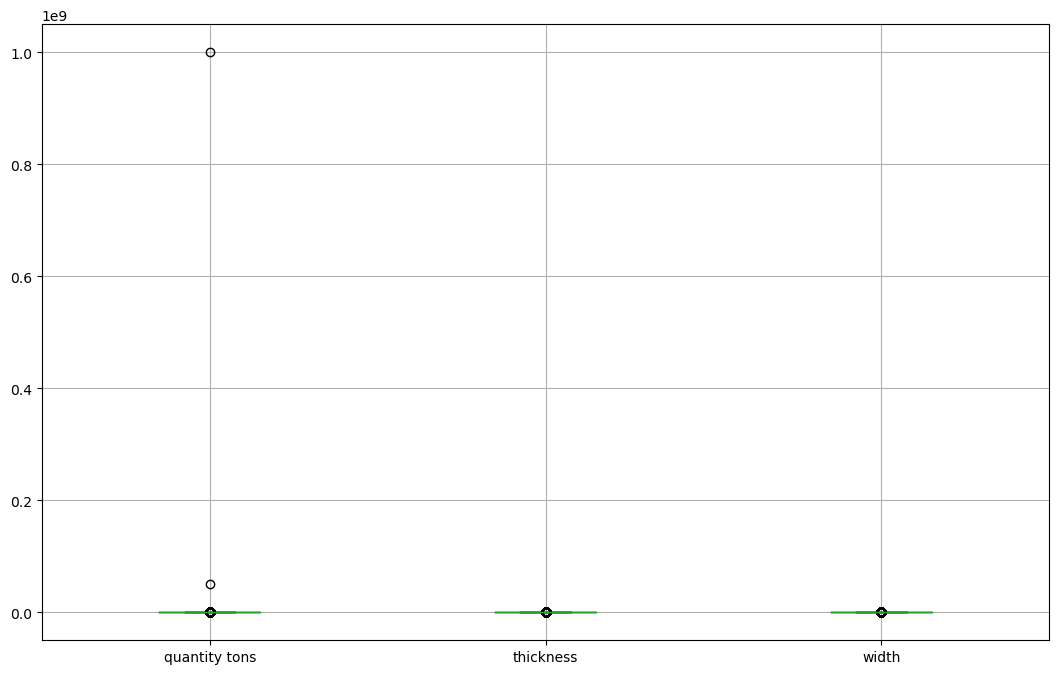

In [21]:
fig = plt.figure(figsize=(13, 8))
df1.boxplot(['quantity tons', 'thickness','width'])

<Axes: >

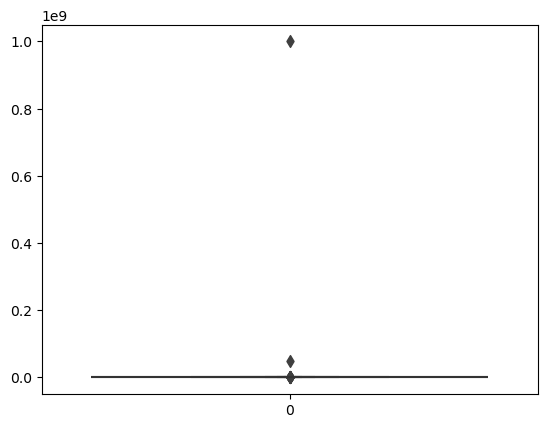

In [22]:
sns.boxenplot(df1['quantity tons'])

<Axes: ylabel='quantity tons'>

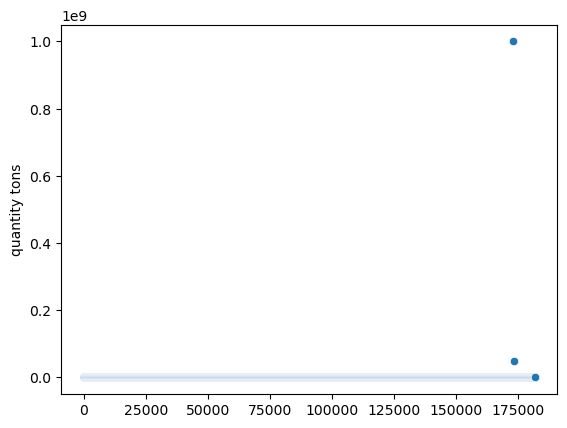

In [27]:
sns.scatterplot(df1['quantity tons'])